In [114]:
import cv2
import matplotlib.pyplot as plt

In [115]:
# 이미지 읽어들이고 크기 변경
img = cv2.imread("flower.jpg")
img = cv2.resize(img, (300, 169))

In [116]:
# 색공간 변경하기
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray2 = cv2.GaussianBlur(gray, (7,7), 0)
im2 = cv2.threshold(gray2, 140, 240, cv2.THRESH_BINARY_INV)[1]

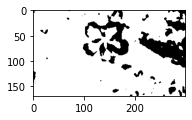

In [117]:
# 화면 왼쪽에 변환한 이미지 출력하기
plt.subplot(1,2,1)
plt.imshow(im2, cmap="gray")

In [118]:
# 윤곽 검출하기
cnts = cv2.findContours(im2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]

In [119]:
# 검출한 윤곽 그리기
for pt in cnts:
    x, y , w, h = cv2.boundingRect(pt)
    # 너무 크거나 작은 부분 제거하기
    if w < 30 or w > 200: continue
    print(x,y,w,h) #결과출력
    cv2.rectangle(img, (x,y), (x+w,y+h), (0, 255, 0), 2)


97 64 30 28
101 9 90 81


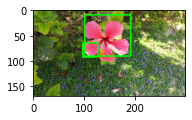

In [120]:
# 화면 오른쪽에 결과 출력하기
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("find_contours.png", dpi=200)
plt.show()

# 엽서에서 우편번호 검출하기

In [121]:
import cv2
import matplotlib.pyplot as plt

In [122]:
# 엽서 이미지에서 우편번호를 추출하는 함수
def detect_zipno(fname):
    #이미지 읽어들이기
    img = cv2.imread(fname)
    #이미지 크기 구하기
    h, w = img.shape[:2]
    #이미지의 오른쪽 윗부분만 추출하기
    img = img[0:h//2, w//3:]

    
    # 이미지 이진화하기
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.GaussianBlur(gray, (3,3), 0)
    im2 = cv2.threshold(gray2, 140, 255, cv2.THRESH_BINARY_INV)[1]
    
    # 윤곽 검출하기
    cnts = cv2.findContours(im2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
    
    # 추출한 이미지에서 윤곽 추출하기
    result = []
    for pt in cnts:
        x, y , w, h = cv2.boundingRect(pt)
        # 너무 크거나 작은 부분 제거하기
        if w < 50 or w > 70: continue
        result.append([x,y,w,h])
    # 추출한 윤곽을 위치에 따라 정렬하기
    result = sorted(result, key = lambda x : x[0])
    #추출한 윤곽이 너무 가까운것들 제거하기
    result2 = []
    lastx = -100
    for x, y, w, h in result:
        if(x - lastx) < 10: continue
        result2.append([x,y,w,h])
        lastx = x
    # 초록색 테두리 출력하기
    for x,y,w,h in result2:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 5)
    return result2, img

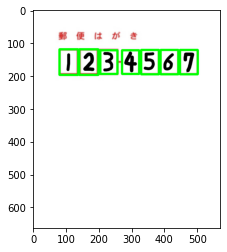

In [124]:
# 이미지를 지정해서 우편번호 추출하기
cnts, img = detect_zipno("hagaki1.png")

# 결과 출력하기
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("detect-zip.png", dpi=200)
plt.show()


# 숫자 이미지 판정하기

In [249]:
# 앞에서 생성한 손글씨 숫자 판정모델을 사용
import matplotlib.pyplot as plt
import joblib

In [250]:
#학습 모델 읽어들이기
clf = joblib.load("digits.pkl")

In [251]:
# 이미지에서 영역 읽기
cnts, img = detect_zipno("hagaki1.png")


C:\Users\MSI02\Anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\MSI02\Anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\MSI02\Anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\MSI02\Anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\MSI02\Anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar inste

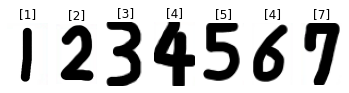

In [264]:
# 읽어은 데이터 출력
for i, pt in enumerate(cnts):
    x,y,w,h = pt
    # 윤곽선으로 감싼부분 작게 만들기
    x += 8
    y += 8
    w -= 16
    h -= 16
    # 이미지 데이터 출력하기
    im2 = img[y:y+h, x:x+w]
    
    # 데이터를 학습에 적합하게 변환하기
    im2gray1 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
    im2gray2 = cv2.resize(im2gray1, (8,8)) # 크기 변경
    im2gray3 = 15 - im2gray2 // 16        # 이진화
    im2gray4 = im2gray3.reshape((-1, 64)) # 차원 변경

    # 데이터 예측하기
    res = clf.predict(im2gray4)
    
    # 출력하기
    plt.subplot(1,7,i+1)
    plt.imshow(im2, cmap="gray")
    plt.axis("off")
    plt.title(res)
   
plt.show()